# Projeto de Álgebra Linear: Transformação Linear e Correlação de Notas
---

Este projeto tem como objetivo aplicar conceitos de álgebra linear para transformar dados de notas de duas provas (p1 e p2) utilizando uma transformação linear, calcular correlações e interpretar os resultados obtidos.

<b>Contexto</b>

A análise de desempenho acadêmico frequentemente utiliza a média como métrica principal. No entanto, explorar outras abordagens matemáticas pode fornecer insights adicionais sobre o comportamento dos dados. Este projeto busca realizar uma transformação linear das notas, obtendo a média e a diferença entre as duas provas, e comparar as correlações entre os dados originais e transformados.

## Import das Bibliotecas/pacotes

In [ ]:
# Bibliotecas para Manipulação de Dados
import numpy as np
import pandas as pd

# Bibliotecas para Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns


## Gerando os Dados para Estudo

In [6]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [183]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


### Calculando a média e a diferença das notas de p1 e p2

In [9]:
# Calculando média e diferença

df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


## Transformando os dados atrabés de uma matriz de transformação para obter a média e a diferença


In [12]:
# Matriz de transformação para obter a média e a diferença
M = np.array([[0.5, 0.5],  # Média (soma e divisão por 2)
              [1, - 1]])  # Diferença

# Convertendo os dados para um array NumPy
X = df[['p1', 'p2']].to_numpy().T  # Transpomos para que cada coluna represente uma variável

# Multiplicação matricial para obter média e diferença
result = np.matmul(M, X)

# Convertendo o resultado de volta para um DataFrame para melhor visualização
df_result = pd.DataFrame(result.T, columns=['Média', 'Diferença'])

# Exibir os resultados
df_result.head()


,Média,Diferença
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


## Correlação entre os dados da **p1** e **p2**


In [29]:
# Obtendo a correlação entre p1 e p2
p1_p2_corr = df[['p1', 'p2']].corr(numeric_only=True)

p1_p2_corr


,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


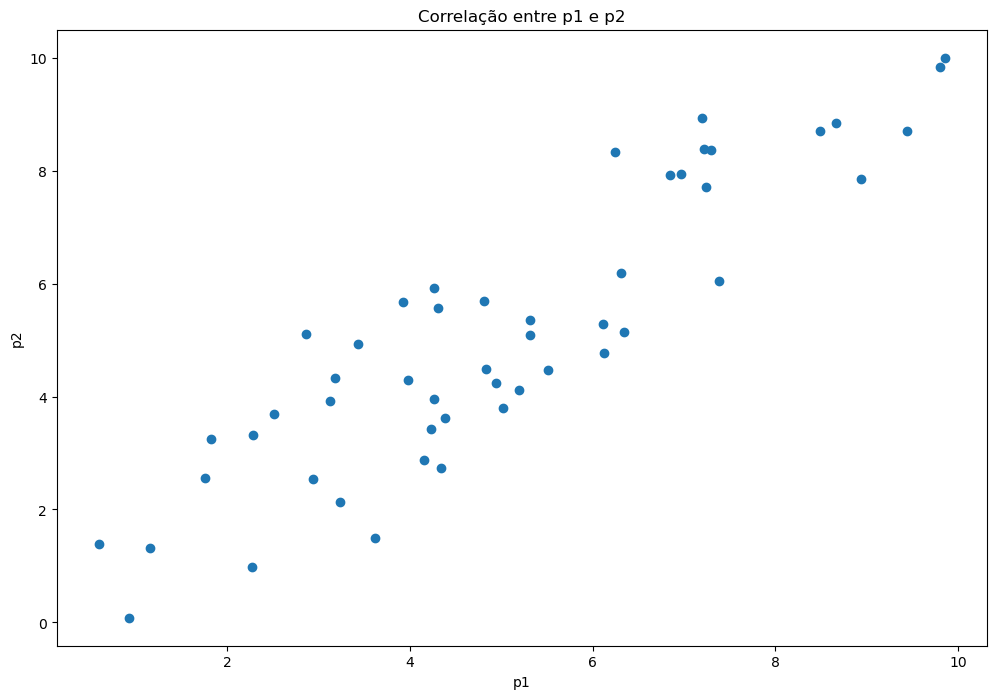

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(df.p1, df.p2)
plt.ylabel('p2')
plt.xlabel('p1')
plt.title('Correlação entre p1 e p2')
plt.show()


## Correlação entre os dados transformados (Média e Diferença)


In [34]:
# Obtendo a correlação entre a médica e a diferença
med_diff_corr = df_result[['Média', 'Diferença']].corr(numeric_only=True)

med_diff_corr

,Média,Diferença
Média,1.000000,-0.133474
Diferença,-0.133474,1.000000


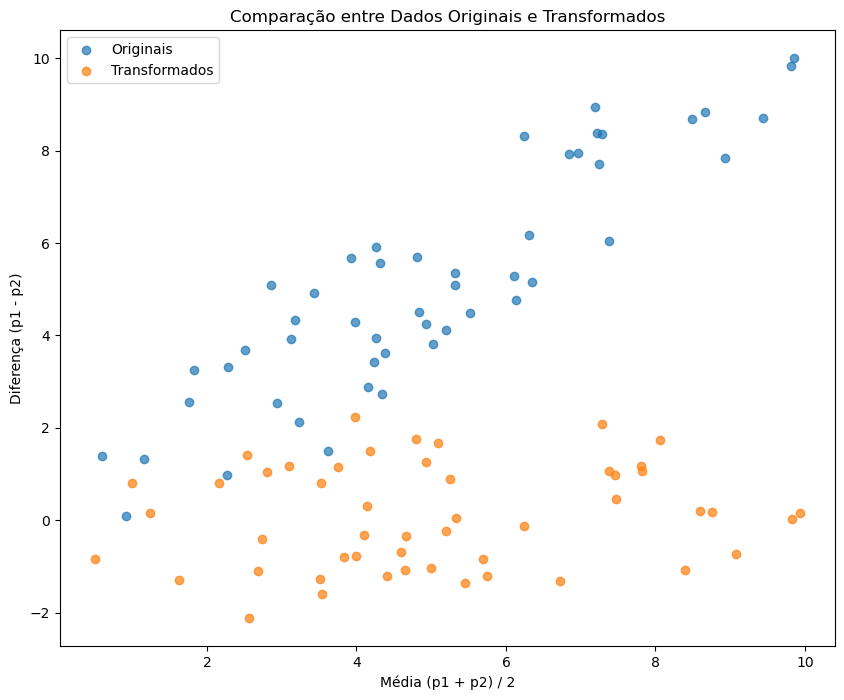

In [36]:
plt.figure(figsize=(10,8))

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='Originais', alpha=0.7)

# Plotar os dados transformados
plt.scatter(df['média'], df['diferença'], label='Transformados', alpha=0.7)

# Adicionar títulos e rótulos
plt.title("Comparação entre Dados Originais e Transformados")
plt.xlabel("Média (p1 + p2) / 2")
plt.ylabel("Diferença (p1 - p2)")

plt.legend()
plt.show()

## Correlação entre  Média e Diferença

In [39]:
# correlação entre p1 e p2 e a Média e a diferença
df_corr = pd.concat([df[['p1', 'p2']], df_result[['Média', 'Diferença']]], axis=1)
correlation_matrix = df_corr.corr()
correlation_matrix

,p1,p2,Média,Diferença
p1,1.000000,0.895737,0.971960,0.103312
p2,0.895737,1.000000,0.975163,-0.349666
Média,0.971960,0.975163,1.000000,-0.133474
Diferença,0.103312,-0.349666,-0.133474,1.000000


## Plotando a Correlação entre p1 e p2 e a Média

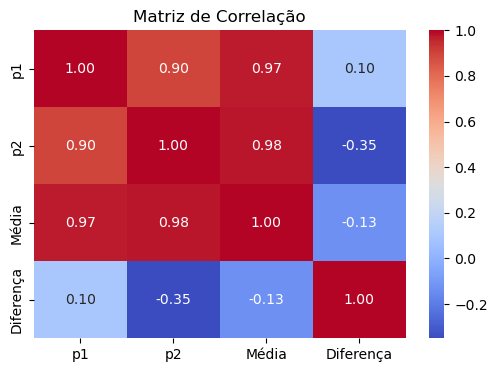

In [49]:
# Visualização da correlação entre p1 e p2 e a M
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Após realizar a correlação das variáveis bservamos que `p1` e `p2` apresentam uma **correlação forte e positiva (0.89)**, o que significa que, à medida que `p1` aumenta, `p2` também tende a crescer. Dessa forma, conhecendo o valor de um dos pontos, conseguimos estimar o outro com razoável precisão.  

Após a transformação, que utiliza a multiplicação matricial para calcular a **média** e a **diferença**, percebemos que a relação entre essas novas variáveis se torna **fraca e negativa (-0.13)**. Isso resulta em uma distribuição aparentemente aleatória, sem uma tendência clara de crescimento ou decrescimento. Esse comportamento faz sentido, pois, enquanto a **média** representa um ponto central dos valores, a **diferença** reflete a dispersão em relação a essa média, reduzindo a dependência linear original.  

Já ao analisarmos a correlação de p1 e p2 com a Média e a Diferença, observamos que Média apresenta correlação muito alta ( positiva e forte) com p1 e p1, ou seja, quanto maior for um desses valores maior será a Média. Enquanto que a Diferença possui uma correlação fraca positiva com p1 (0.103312) e  moderada negativa com p2 (-0.349666). Isso sugere que p2 tem um impacto negativo na diferença, ou seja, conforme p2 aumenta, a Diferença tende a diminuir. Já p1 parece ter uma relação ligeiramente positiva com Diferença.

##  Matriz de transformação para obter a soma e a diferença


In [44]:
# Matriz de transformação para obter a soma e a diferença
M = np.array([[1, 1],  # Soma (p1 + p2)
              [1, -1]])  # Diferença (p1 - p2)

# Convertendo os dados para um array NumPy
X = df[['p1', 'p2']].to_numpy().T  # Transpomos para alinhamento na multiplicação

# Multiplicação matricial para obter soma e diferença
result = np.matmul(M, X)

# Convertendo o resultado para um DataFrame
df_soma = pd.DataFrame(result.T, columns=['Soma', 'Diferença'])

# Exibir os resultados
df_soma.head()


,Soma,Diferença
0,14.908120,-0.978736
1,7.960930,-2.238143
2,3.242944,1.294085
3,9.987507,1.038788
4,16.133092,-1.743712


# Correlação entre p1 e p2 e a Média e a diferença e soma


In [53]:
#correlação entre p1 e p2 e a Média e a diferença
df_corr = pd.concat([df[['p1', 'p2']], df_result[['Média', 'Diferença']], df_soma[['Soma']]], axis=1)
correlation_matrix = df_corr.corr()
correlation_matrix

,p1,p2,Média,Diferença,Soma
p1,1.000000,0.895737,0.971960,0.103312,0.971960
p2,0.895737,1.000000,0.975163,-0.349666,0.975163
Média,0.971960,0.975163,1.000000,-0.133474,1.000000
Diferença,0.103312,-0.349666,-0.133474,1.000000,-0.133474
Soma,0.971960,0.975163,1.000000,-0.133474,1.000000


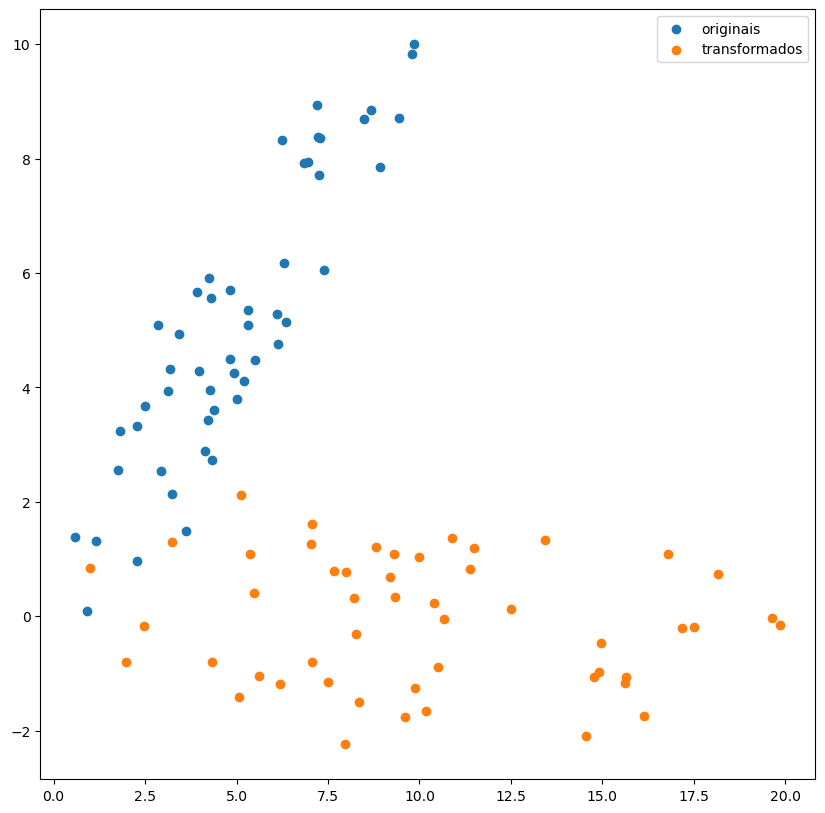

In [55]:
plt.figure(figsize=(10,10))

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_soma['Soma'], df_soma['Diferença'], label='transformados')

#Legenda
plt.legend()
plt.show()

Após a nova transformação utilizando a soma e a diferença, os valores transformados apresentaram maior dispersão, evidenciando uma variação mais acentuada no eixo X em comparação à transformação pela média. Isso ocorre porque a soma cresce mais rapidamente do que a média, resultando em uma distribuição mais ampla dos pontos. Por outro lado, na transformação pela média, os valores estavam mais concentrados e uniformes, seguindo um padrão mais alinhado, o que indica uma menor dispersão na relação entre média e diferença.


A correlação da soma apresenta o mesmo valor da correlação da média, pois a média nada mais é do que uma versão escalada da soma, resultante da multiplicação por 1/2. Como a escala não afeta os coeficientes de correlação, é esperado que ambas mantenham a mesma relação com as demais variáveis.